In [5]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 6.4 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for scipy>=1.2.0 from https://files.pythonhosted.org/packages/65/da/4d0dfd29379c8ee3ba54b19249f673cc98448e0fd86170339fb02031f0e9/scipy-1.11.2-cp310-cp310-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 2.1 MB/s eta 0:00:00
  Obtaining dependency information for matplotlib>=3.0 from https://files.pythonhosted.org/packages/54/6d/78dd357b35a9c94a56c51a34c123460313e3bdf2e454ce4274ac67b9a5e0/matplotlib-3.7.2-cp310-cp310-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for autograd>=1.5 from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
  Using cached autograd-1.6.2-py3-none-any.whl.metadata (706 bytes)
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for formulaic>=0.2.2 from http

In [26]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
from lifelines import NelsonAalenFitter
from lifelines import CoxPHFitter

In [8]:
df = pd.read_csv('MFG10YearTerminationData.csv') 
df[['length_of_service', 'STATUS']]
df['Observed'] = df['STATUS'].apply(lambda x: 1 if x == 'TERMINATED' else 0)

In [4]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [7]:
kmf = KaplanMeierFitter()

In [9]:
kmf.fit(df['length_of_service'], df['Observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 49653 total observations, 48168 right-censored observations>

<Axes: title={'center': 'Employee Contract Termination Survival Function'}, xlabel='timeline'>

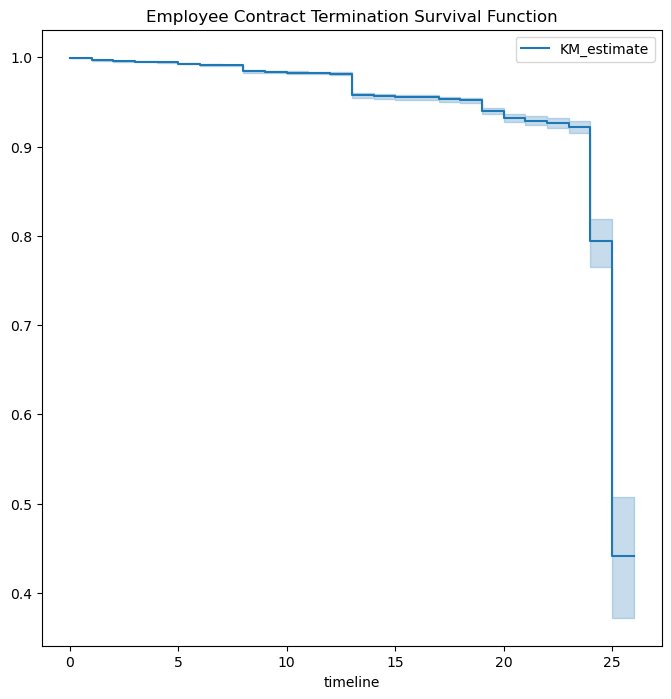

In [11]:
plt.figure(figsize = (8,8))
plt.title('Employee Contract Termination Survival Function')
kmf.plot_survival_function()

In [16]:
a = kmf.survival_function_
a = a.reset_index()
b = kmf.cumulative_density_
b = b.reset_index()
c = pd.merge(a,b,on = 'timeline', how = 'left')
c.columns = ['timeline','Cumulative KM estimate','KM estimate']
c

,timeline,Cumulative KM estimate,KM estimate
0,0.0,0.999376,0.000624
1,1.0,0.996526,0.003474
2,2.0,0.995824,0.004176
3,3.0,0.995294,0.004706
4,4.0,0.994662,0.005338
5,5.0,0.993068,0.006932
6,6.0,0.991732,0.008268
7,7.0,0.991035,0.008965
8,8.0,0.984238,0.015762
9,9.0,0.983665,0.016335


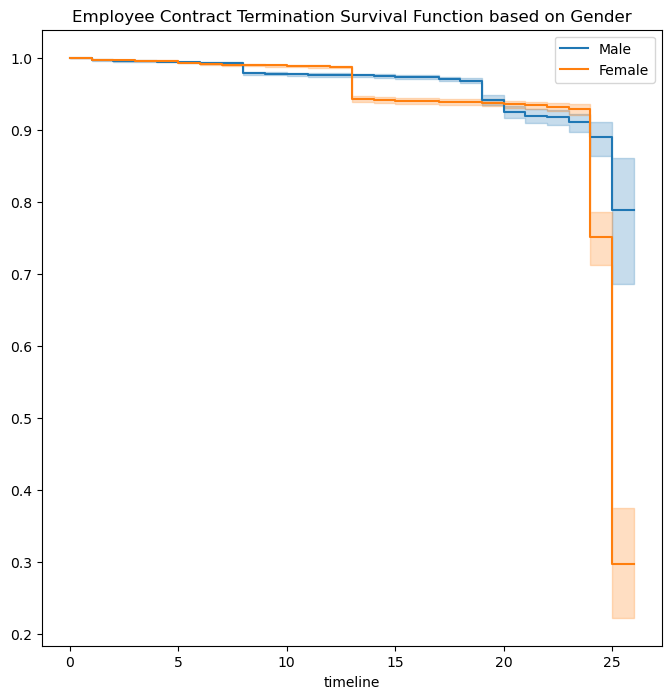

In [18]:
df_m = df[df['gender_short'] == 'M']
df_f = df[df['gender_short'] == 'F']

#Prepare the survival function
kmf_m = KaplanMeierFitter()
kmf_f = KaplanMeierFitter()

#Estimate both dataset to acquire the survival function
kmf_m.fit(df_m['length_of_service'], df_m['Observed'], label = 'Male')
kmf_f.fit(df_f['length_of_service'], df_f['Observed'], label = 'Female')

#Produce the survival function plot
plt.figure(figsize = (8,8))
plt.title('Employee Contract Termination Survival Function based on Gender')
kmf_m.plot_survival_function()
kmf_f.plot_survival_function()
plt.show()

In [20]:
results = logrank_test(df_m['length_of_service'],
                       df_f['length_of_service'],
                       df_m['Observed'],
                       df_f['Observed'], alpha=.95)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          24.03 <0.005     20.00

### Hazard Function using Nelson-Aalen

<Axes: title={'center': 'Employee Contract Termination Hazard Function'}, xlabel='timeline'>

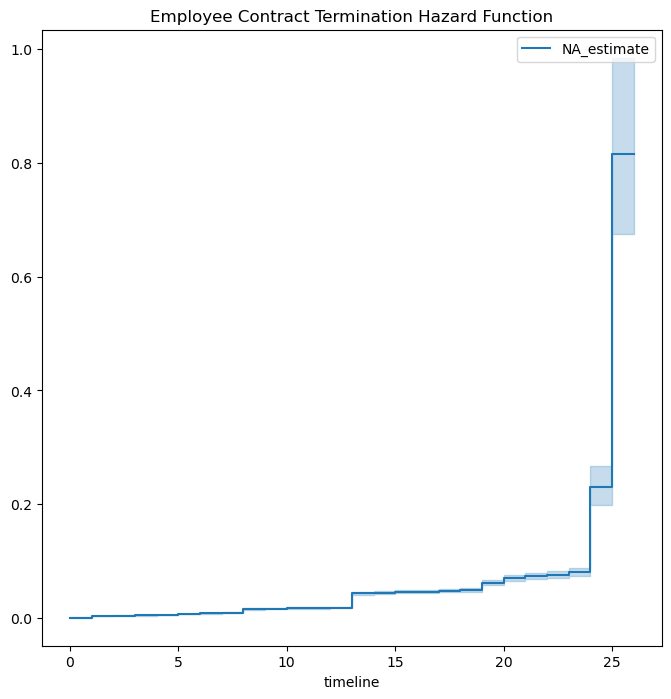

In [22]:
naf = NelsonAalenFitter()
naf.fit(df['length_of_service'], df['Observed'])

plt.figure(figsize = (8,8))
plt.title('Employee Contract Termination Hazard Function')
naf.plot_cumulative_hazard()

In [23]:
ch = naf.cumulative_hazard_
ch.head()

,NA_estimate
timeline,
0.0,0.000625
1.0,0.003480
2.0,0.004184
3.0,0.004717
4.0,0.005352


### Survival Regression with Cox’s proportional hazard model

In [24]:
training = df[['age', 'gender_short', 'BUSINESS_UNIT', 'length_of_service','Observed']].copy()

In [25]:
training = pd.get_dummies(data = training, columns = ['gender_short', 'BUSINESS_UNIT'], drop_first = True)
training.head()

,age,length_of_service,Observed,gender_short_M,BUSINESS_UNIT_STORES
0,52,17,0,True,False
1,53,18,0,True,False
2,54,19,0,True,False
3,55,20,0,True,False
4,56,21,0,True,False


In [27]:
cph = CoxPHFitter()
cph.fit(training, duration_col='length_of_service', event_col='Observed')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 49653 total observations, 48168 right-censored observations>
             duration col = 'length_of_service'
                event col = 'Observed'
      baseline estimation = breslow
   number of observations = 49653
number of events observed = 1485
   partial log-likelihood = -14244.39
         time fit was run = 2023-08-29 09:32:15 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
age                   -0.01       0.99       0.00            -0.02            -0.01                 0.98                 0.99
gender_short_M        -0.30       0.74       0.05            -0.40            -0.19                 0.67                 0.83
BUSINESS_UNIT_STORES  -0.07       0.93       0.13            -0.32             0.18                 0.72                 1.20

                       cmp to     z      p   -log2(p)
covariate                                            
age                      0.00 -3.46 <0.005      10.87
gender_short_M           0.00 -5.49 <0.005      24.59
BUSINESS_UNIT_STORES     0.00 -0.55   0.58       0.78
---
Concordance = 0.59
Partial AIC = 28494.77
log-likelihood ratio test = 39.91 on 3 df
-log2(p) of ll-ratio test = 26.42

<Axes: >

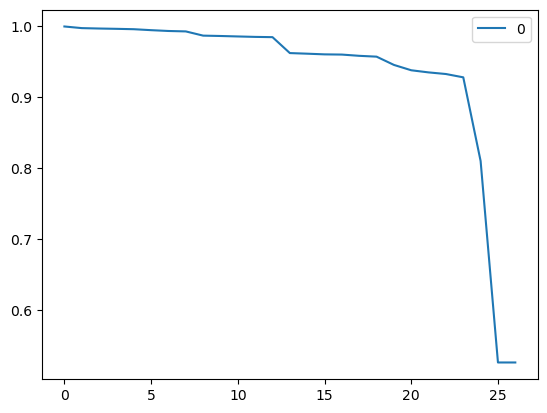

In [28]:
cph.predict_survival_function(training[['age', 'gender_short_M', 'BUSINESS_UNIT_STORES']].loc[0]).plot()

<Axes: >

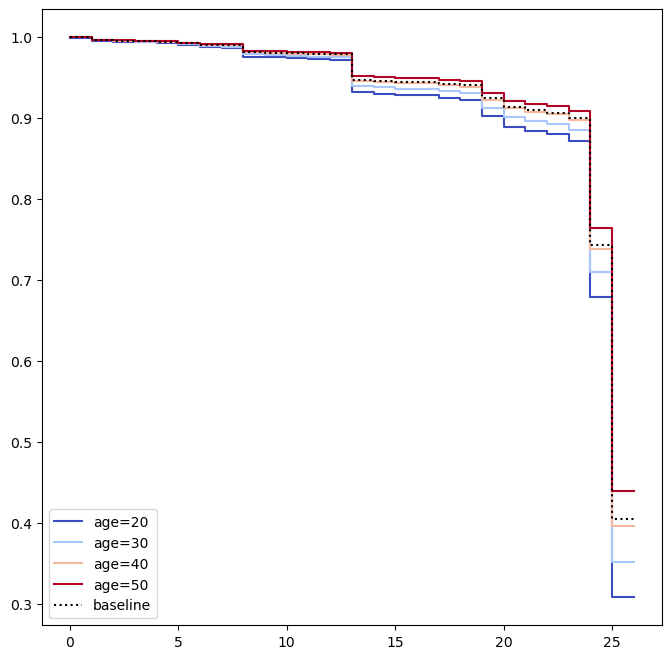

In [29]:
cph.plot_partial_effects_on_outcome(covariates='age', values=[20,30, 40, 50], cmap='coolwarm', figsize = (8,8))